In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("D:/MCA/DATA SCIENCE/DS LAB/student_performance_new.csv")

In [3]:
df.head()

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment 1,Assignment 2,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment 1        54 non-null     int64  
 15  Assignment 2        54 non-null     int64  
 16  Assignment

In [5]:
df.describe()

,Sl.No.,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment 1,Assignment 2,Assignment Result,Result
count,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,27.907407,23.740741,30.462963,18.87037,24.358025,0.462963,5.592593,5.148148,9.490566,15.481481,0.981481,39.839506,13.759259,13.666667,1.0,0.500000
std,16.156392,8.355735,9.158382,7.47334,6.489744,0.503308,1.363521,1.516045,1.011903,1.710023,0.136083,6.903495,0.698656,0.700404,0.0,0.504695
min,1.000000,6.000000,6.000000,5.00000,12.666667,0.000000,2.500000,2.000000,7.000000,10.500000,0.000000,27.000000,13.000000,12.000000,1.0,0.000000
25%,14.250000,17.000000,25.500000,14.25000,18.916667,0.000000,5.000000,4.000000,10.000000,15.000000,1.000000,35.041667,13.000000,13.000000,1.0,0.000000
50%,27.500000,25.000000,32.000000,18.00000,24.000000,0.000000,5.500000,5.000000,10.000000,15.500000,1.000000,38.500000,14.000000,14.000000,1.0,0.500000
75%,41.750000,29.750000,37.750000,22.00000,28.500000,1.000000,6.875000,6.000000,10.000000,16.500000,1.000000,45.375000,14.000000,14.000000,1.0,1.000000
max,55.000000,46.000000,45.000000,43.00000,41.000000,1.000000,8.000000,10.000000,10.000000,20.000000,1.000000,60.000000,15.000000,15.000000,1.0,1.000000


In [6]:
df.shape

(54, 18)

In [7]:
df.isna().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment 1          0
Assignment 2          0
Assignment Result     0
Result                0
dtype: int64

In [92]:
df['Compensatory'] = df['Compensatory'].fillna(df['Compensatory'].mean())

In [8]:
df.isna().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment 1          0
Assignment 2          0
Assignment Result     0
Result                0
dtype: int64

In [9]:
x=df[df.columns[3:17]]
x

,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment 1,Assignment 2,Assignment Result
0,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1
1,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1
2,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1
3,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1
4,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1
5,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1
6,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1
7,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1
8,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1
9,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1


In [11]:
y = df["Result"]
y

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    0
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    1
32    1
33    1
34    0
35    1
36    1
37    1
38    0
39    1
40    1
41    0
42    1
43    0
44    0
45    1
46    0
47    0
48    0
49    1
50    0
51    0
52    0
53    1
Name: Result, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [13]:
clf = DecisionTreeClassifier(criterion='gini',max_depth = 2,random_state =20)

In [14]:
clf = clf.fit(x_train,y_train)

In [15]:
classnames = ['Pass','Fail']

[Text(0.6, 0.8333333333333334, 'Test Total  <= 24.333\ngini = 0.499\nsamples = 40\nvalue = [19, 21]\nclass = Fail'),
 Text(0.4, 0.5, 'Test Total  <= 22.833\ngini = 0.287\nsamples = 22\nvalue = [19, 3]\nclass = Pass'),
 Text(0.2, 0.16666666666666666, 'gini = 0.172\nsamples = 20\nvalue = [18, 2]\nclass = Pass'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [1, 1]\nclass = Pass'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Fail')]

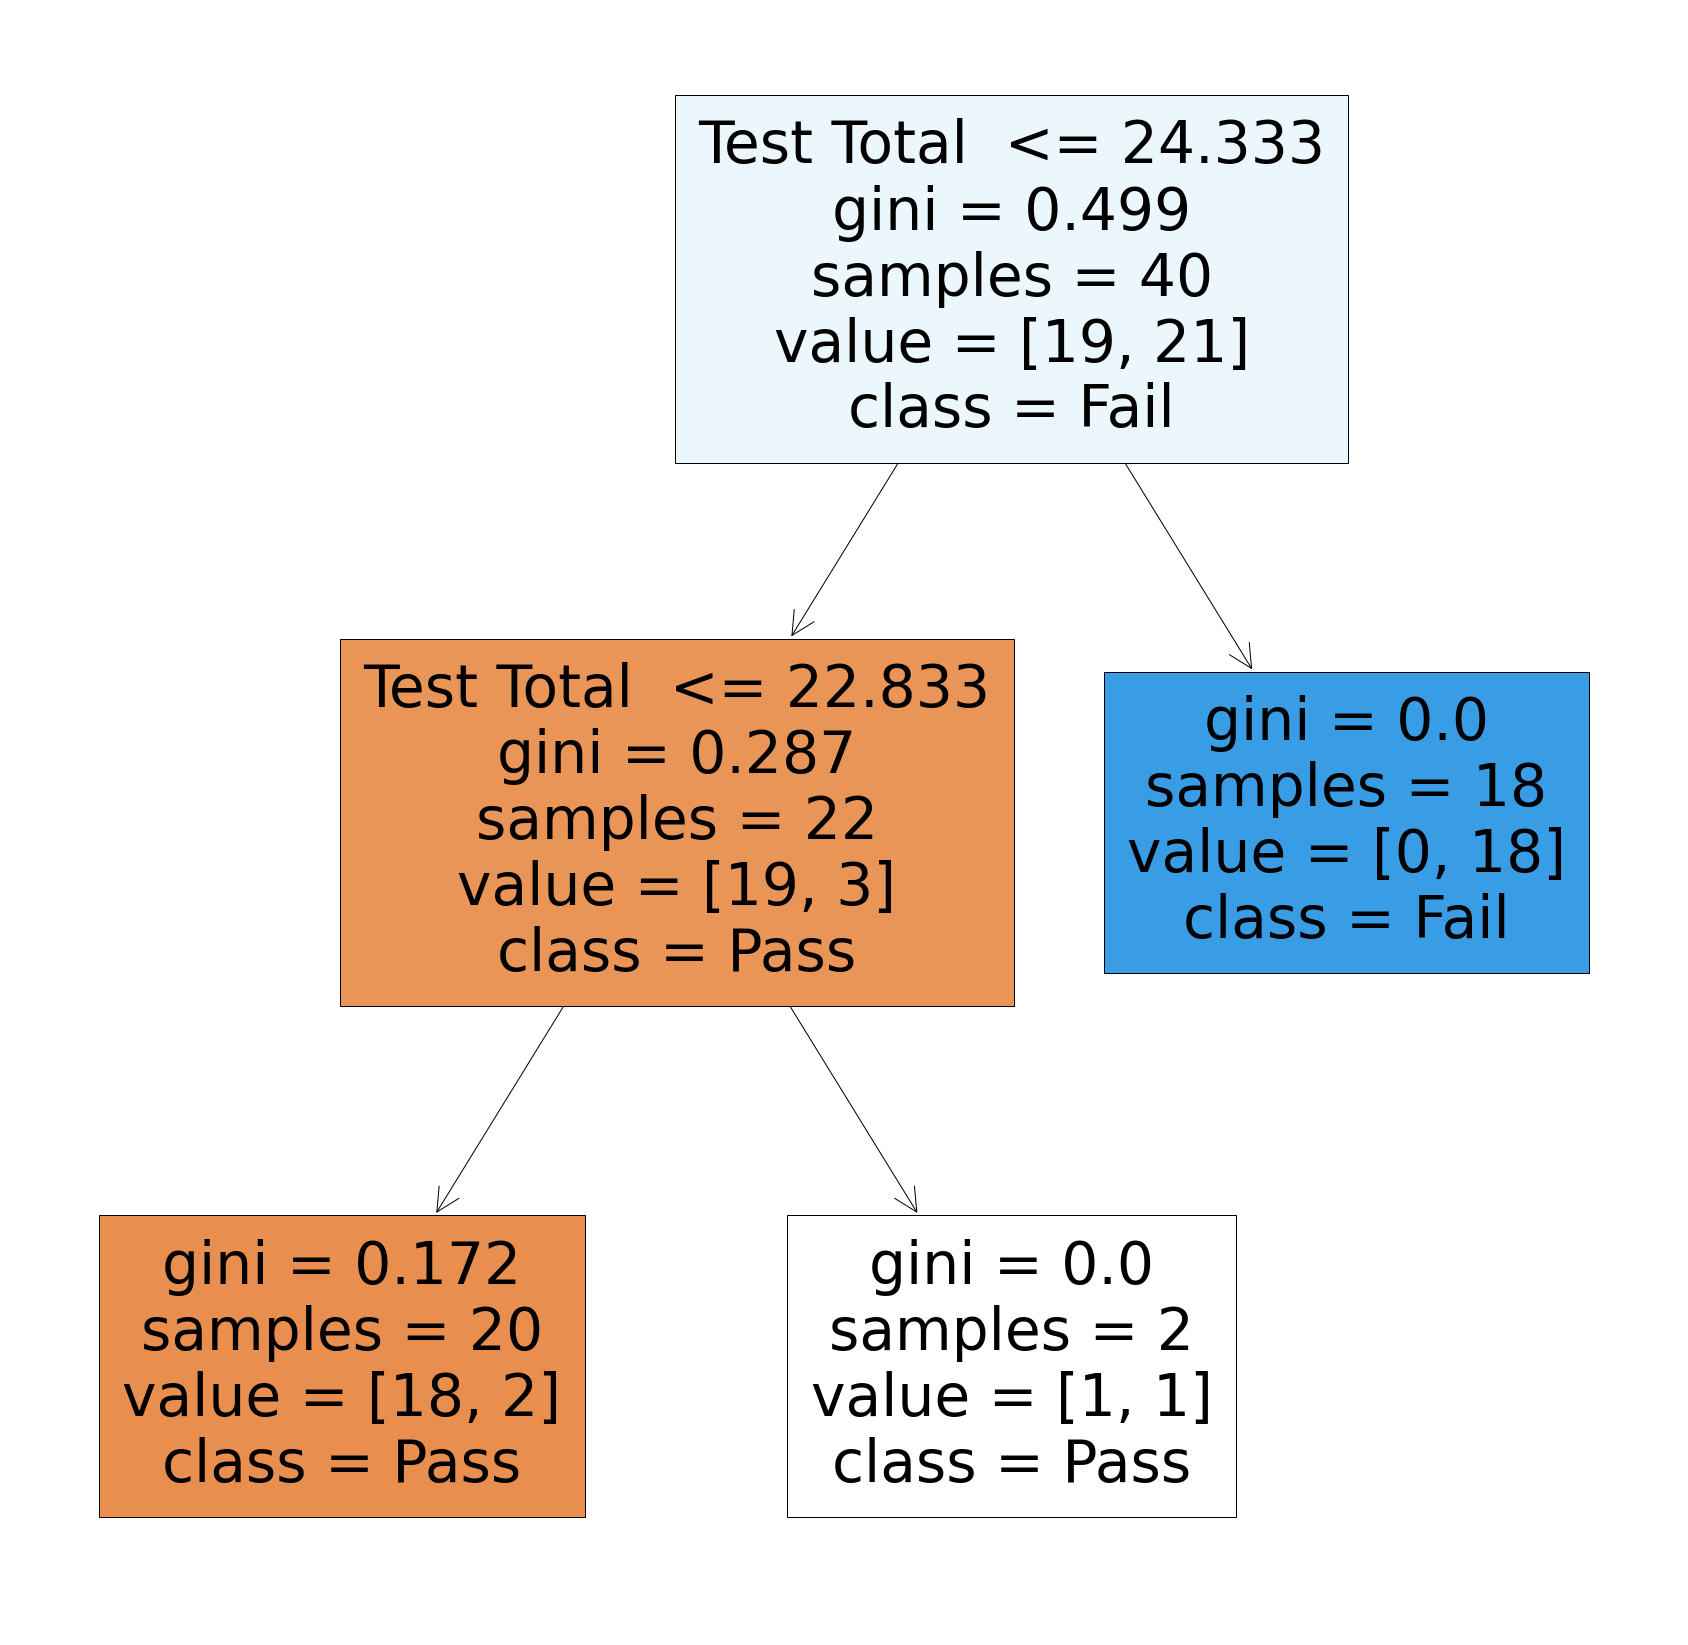

In [16]:
fig = plt.figure(figsize=(30,30))
from sklearn import tree
tree.plot_tree(clf,feature_names = x_train.columns,class_names = classnames,filled =True)

<AxesSubplot:>

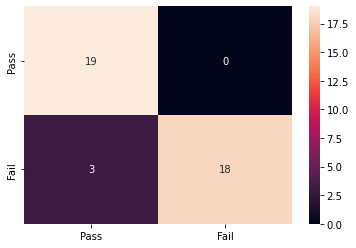

In [19]:
train_tree_predict = clf.predict(x_train)
confusionmatrix=confusion_matrix(y_train,train_tree_predict)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames)

In [20]:
accuracy=accuracy_score(y_train,train_tree_predict)
print(accuracy)

0.925


In [22]:
test_tree_predict = clf.predict(x_test)
accuracy=accuracy_score(y_test,test_tree_predict)
print(accuracy)

0.7857142857142857
